In [32]:
import pandas as pd
import numpy as np
from google.colab import files
import io

file = files.upload()


Saving insurance.csv to insurance (4).csv


In [33]:
import io

# Assuming only one file is uploaded, get its name
filename = list(file.keys())[0]
insurance_data = pd.read_csv(io.BytesIO(file[filename]))

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
insurance_data.isnull().sum() #check NAs/ blank cells

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df = pd.DataFrame(insurance_data)
X = df[df.columns[:-1]]  #all but last
y = df[df.columns[-1]]   #last

X_encoded = pd.get_dummies(X)
#has to be train, test, train, test ...(data, y....
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = .2, random_state = 42)

#X_encoded
#X_train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  #no fit Test

model = LinearRegression()
model.fit(X_train_scaled, y_train)  #training
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_pred,y_test)
mse


33596915.85136148

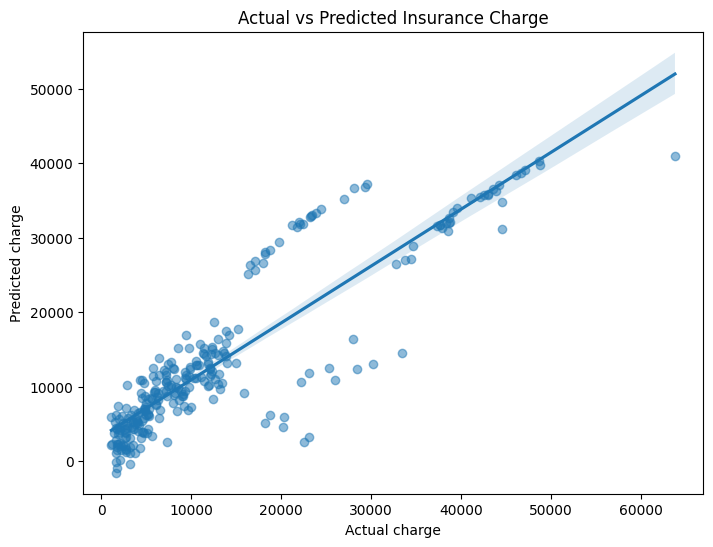

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual charge")
plt.ylabel("Predicted charge")
plt.title("Actual vs Predicted Insurance Charge")
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.7835929767120722

In [15]:
coef_df = pd.DataFrame({'Feature': X_encoded.columns,
                        'Coefficient': model.coef_
                       }).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
6,smoker_yes,4779.240704
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
7,region_northeast,199.698058
8,region_northwest,38.734949
3,sex_female,4.646551
4,sex_male,-4.646551
9,region_southeast,-86.621147
10,region_southwest,-150.167101


**Predicting patient charges based on new inputs for age and bmi**

In [26]:
# ========== NEW DATA PREDICTION ==========

# New sample input (same shape as X_encoded) but only 1 row (1 patient)

sample_input = X_train.iloc[0].copy() #copy first row of training set for manipulation
sample_input['age'] = 190
sample_input['bmi'] = 56


sample_input_scaled = scaler.transform([sample_input])  #no fit
predicted_price = model.predict(sample_input_scaled)

print(f"Predicted charge: ${predicted_price[0]:,.2f}\n")



Predicted charge: $56,251.23



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Importance of each feature on Insurance premium** //
**Age and BMI seem to be the largest predictors**

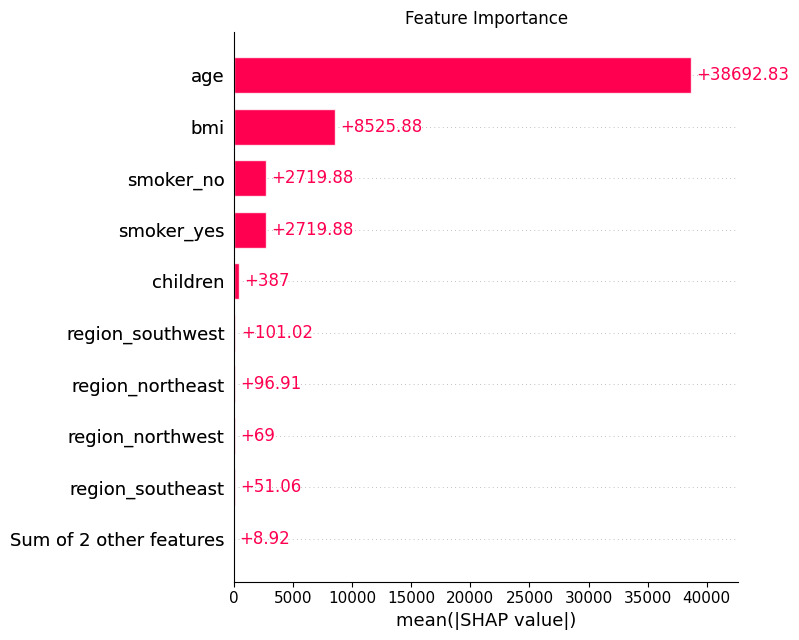

In [24]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

#include feature names in SHAP
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

sample_input_scaled_df = pd.DataFrame(
    sample_input_scaled,
    columns=X_train.columns
)

explainer = shap.Explainer(model, X_train_scaled_df)

#SHAP vals: feature importance
shap_values = explainer(sample_input_scaled_df)


#Bar plot to show overall feature importance
shap.plots.bar(shap_values, show=False)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


